## Loading Libraries:

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
  
from scipy.stats import trim_mean 

## Loading Data:

In [2]:
data = pd.read_csv("state.csv") 
  
# Check the type of data 
print ("Type : ", type(data), "\n\n") 
  
# Printing Top 10 Records 
print ("Head -- \n", data.head(10)) 
  
# Printing last 10 Records  
print ("\n\n Tail -- \n", data.tail(10)) 

Type :  <class 'pandas.core.frame.DataFrame'> 


Head -- 
          State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
8      Florida    18801310          5.8           FL
9      Georgia     9687653          5.7           GA


 Tail -- 
             State  Population  Murder.Rate Abbreviation
40   South Dakota      814180          2.3           SD
41      Tennessee     6346105          5.7           TN
42          Texas    25145561          4.4           TX
43           Utah     2763885          2.3           UT
44        Vermont      625741          1.6           VT
45       

## Code #1 : Adding Column to the dataframe

In [3]:
# Adding a new column with derived data  
  
data['PopulationInMillions'] = data['Population']/1000000
  
# Changed data 
print (data.head(5)) 

        State  Population  Murder.Rate Abbreviation  PopulationInMillions
0     Alabama     4779736          5.7           AL              4.779736
1      Alaska      710231          5.6           AK              0.710231
2     Arizona     6392017          4.7           AZ              6.392017
3    Arkansas     2915918          5.6           AR              2.915918
4  California    37253956          4.4           CA             37.253956


## Code #2 : Data Description

In [4]:
data.describe() 

,Population,Murder.Rate,PopulationInMillions
count,5.000000e+01,50.000000,50.000000
mean,6.162876e+06,4.066000,6.162876
std,6.848235e+06,1.915736,6.848235
min,5.636260e+05,0.900000,0.563626
25%,1.833004e+06,2.425000,1.833004
50%,4.436370e+06,4.000000,4.436369
75%,6.680312e+06,5.550000,6.680312
max,3.725396e+07,10.300000,37.253956


## Code #3 : Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State                   50 non-null object
Population              50 non-null int64
Murder.Rate             50 non-null float64
Abbreviation            50 non-null object
PopulationInMillions    50 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


## Code #4 : Renaming a column heading

In [6]:
# Rename column heading as it  
# has '.' in it which will create 
# problems when dealing functions  
  
data.rename(columns ={'Murder.Rate': 'MurderRate'}, inplace = True) 
  
# Lets check the column headings 
list(data) 

['State', 'Population', 'MurderRate', 'Abbreviation', 'PopulationInMillions']

## Code #5 : Calculating Mean

In [7]:
Population_mean = data.Population.mean() 
print ("Population Mean : ", Population_mean) 
  
MurderRate_mean = data.MurderRate.mean() 
print ("\nMurderRate Mean : ", MurderRate_mean) 

Population Mean :  6162876.3

MurderRate Mean :  4.066


## Code #6 : Trimmed mean

In [8]:
# Mean after discarding top and  
# bottom 10 % values eliminating outliers 
  
population_TM = trim_mean(data.Population, 0.1) 
print ("Population trimmed mean: ", population_TM) 
  
murder_TM = trim_mean(data.MurderRate, 0.1) 
print ("\nMurderRate trimmed mean: ", murder_TM)

Population trimmed mean:  4783697.125

MurderRate trimmed mean:  3.9450000000000003


## Code #7 : Weighted Mean

In [9]:
# here murder rate is weighed as per  
# the state population 
  
murderRate_WM = np.average(data.MurderRate, weights = data.Population) 
print ("Weighted MurderRate Mean: ", murderRate_WM)

Weighted MurderRate Mean:  4.445833981123393


## Code #8 : Median

In [10]:
Population_median = data.Population.median() 
print ("Population median : ", Population_median) 
  
MurderRate_median = data.MurderRate.median() 
print ("\nMurderRate median : ", MurderRate_median)

Population median :  4436369.5

MurderRate median :  4.0


## Visualizing Population per Million

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

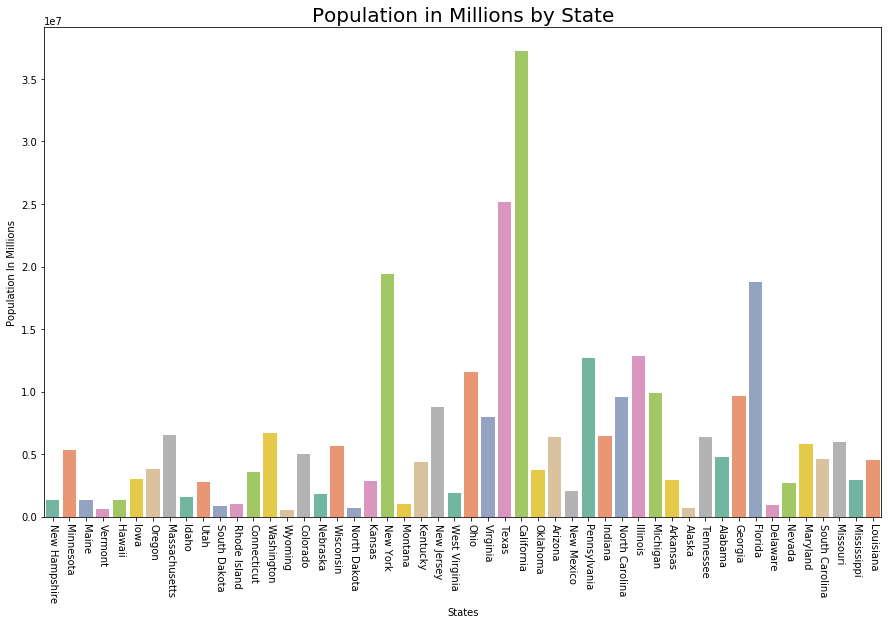

In [11]:
# Plot Population In Millions 
fig, ax1 = plt.subplots() 
fig.set_size_inches(15,  9) 
  
  
ax1 = sns.barplot(x ="State", y ="Population",  
                  data = data.sort_values('MurderRate'),  
                                        palette ="Set2") 
  
ax1.set(xlabel ='States', ylabel ='Population In Millions') 
ax1.set_title('Population in Millions by State', size = 20) 
  
plt.xticks(rotation =-90) 

## Visualizing Murder Rate per Lakh

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

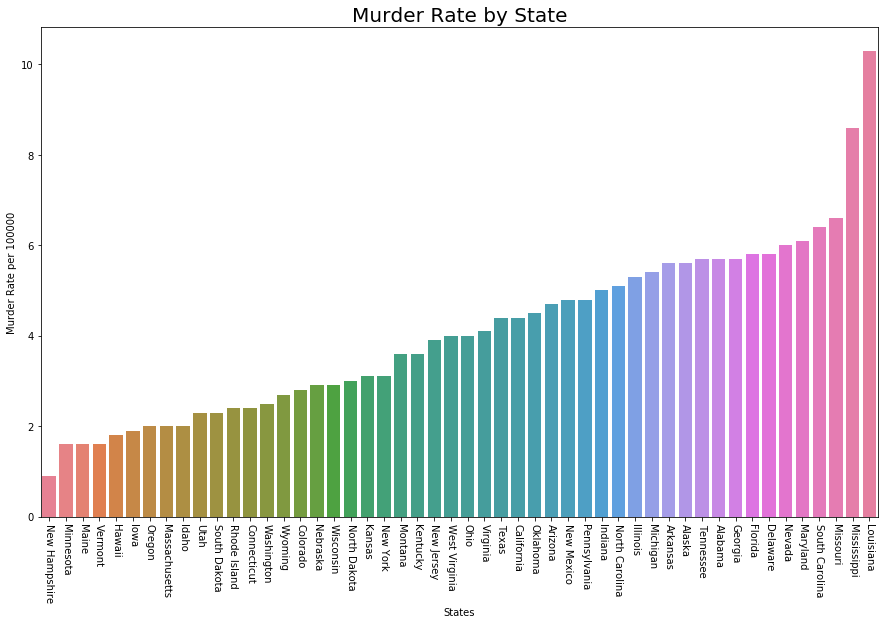

In [12]:
# Plot Murder Rate per 1, 00, 000 
  
fig, ax2 = plt.subplots() 
fig.set_size_inches(15,  9) 
  
  
ax2 = sns.barplot( 
    x ="State", y ="MurderRate",  
    data = data.sort_values('MurderRate', ascending = 1),  
                                         palette ="husl") 
  
ax2.set(xlabel ='States', ylabel ='Murder Rate per 100000') 
ax2.set_title('Murder Rate by State', size = 20) 
  
plt.xticks(rotation =-90) 

Although Louisiana is ranked 17 by population (about 4.53M), it has the highest Murder rate of 10.3 per 1M people.

## Code #1 : Standard Deviation

In [13]:
Population_std = data.Population.std() 
print ("Population std : ", Population_std) 
  
MurderRate_std = data.MurderRate.std() 
print ("\nMurderRate std : ", MurderRate_std) 

Population std :  6848235.347401142

MurderRate std :  1.915736124302923


## Code #2 : Variance

In [14]:
Population_var = data.Population.var() 
print ("Population var : ", Population_var) 
  
MurderRate_var = data.MurderRate.var() 
print ("\nMurderRate var : ", MurderRate_var) 

Population var :  46898327373394.445

MurderRate var :  3.670044897959184


## Code #3 : Inter Quartile Range

In [19]:
# Inter Quartile Range of Population 
population_IQR = data.Population.describe()['75%'] - data.Population.describe()['25%'] 
  
print ("Population IQR : ", population_IQR) 
  
# Inter Quartile Range of Murder Rate 
MurderRate_IQR = data.MurderRate.describe()['75%'] - data.MurderRate.describe()['25%'] 
  
print ("\nMurderRate IQR : ", MurderRate_IQR)

Population IQR :  4847308.0

MurderRate IQR :  3.124999999999999


## Code #4 : Median Absolute Deviation (MAD)

In [20]:
Population_mad = data.Population.mad() 
print ("Population mad : ", Population_mad) 
  
MurderRate_mad = data.MurderRate.mad() 
print ("\nMurderRate mad : ", MurderRate_mad)

Population mad :  4450933.356000001

MurderRate mad :  1.5526400000000005
